In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr

In [58]:
bowling = pd.read_csv('Bowling_ODI.csv')

In [59]:
bowling.head()

,Unnamed: 0,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Unnamed: 13
0,0,M Muralitharan (Asia/ICC/SL),1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10,NaN
1,1,Wasim Akram (PAK),1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6,NaN
2,2,Waqar Younis (PAK),1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13,NaN
3,3,WPUJC Vaas (Asia/SL),1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4,NaN
4,4,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9,NaN


In [60]:
bowling.dtypes

Unnamed: 0       int64
Player          object
Span            object
Mat              int64
Inns            object
Balls           object
Runs            object
Wkts            object
BBI             object
Ave             object
Econ            object
SR              object
4               object
5               object
Unnamed: 13    float64
dtype: object

In [61]:
bowling[['Start Year','End Year']] = bowling.Span.str.split("-",expand=True) 

In [62]:
bowling = bowling.replace('-', 0)
bowling = bowling.replace('- ', 0)
bowling = bowling.replace(' -', 0)
bowling = bowling.replace(' - ', 0)

In [63]:
bowling.drop(columns=['Unnamed: 0'], inplace=True)
bowling.drop(columns=['Span'], inplace=True)
bowling.drop(columns=['Unnamed: 13'], inplace=True)

In [64]:
bowling.Player

0       M Muralitharan (Asia/ICC/SL)
1                  Wasim Akram (PAK)
2                 Waqar Younis (PAK)
3               WPUJC Vaas (Asia/SL)
4       Shahid Afridi (Asia/ICC/PAK)
                    ...             
2577                TJ Zoehrer (AUS)
2578                    K Zondo (SA)
2579                B Zuiderent (NL)
2580                Zulqarnain (PAK)
2581         Zulqarnain Haider (PAK)
Name: Player, Length: 2582, dtype: object

In [65]:
bowling.Player.str.split(" ")
bowling['Country'] = bowling.Player.str.split(" ").str.get(-1)
bowling['Player Name'] = bowling.Player.str.split(" ").str.get(1)

In [66]:
bowling['Player'] = bowling['Player Name']
bowling.drop(columns=['Player Name'], inplace=True)

In [67]:
bowling.head()

,Player,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Start Year,End Year,Country
0,Muralitharan,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10,1993,2011,(Asia/ICC/SL)
1,Akram,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6,1984,2003,(PAK)
2,Younis,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13,1989,2003,(PAK)
3,Vaas,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4,1994,2008,(Asia/SL)
4,Afridi,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9,1996,2015,(Asia/ICC/PAK)


In [69]:
bowling['Inns'] = pd.to_numeric(bowling['Inns'], errors='coerce')
bowling['Mat'] = pd.to_numeric(bowling['Mat'], errors='coerce')
bowling['Balls'] = pd.to_numeric(bowling['Balls'], errors='coerce')
bowling['Runs'] = pd.to_numeric(bowling['Runs'], errors='coerce')
bowling['Wkts'] = pd.to_numeric(bowling['Wkts'], errors='coerce')
bowling['Ave'] = pd.to_numeric(bowling['Ave'], errors='coerce')
bowling['SR'] = pd.to_numeric(bowling['SR'], errors='coerce')
bowling['5'] = pd.to_numeric(bowling['5'], errors='coerce')
bowling['4'] = pd.to_numeric(bowling['4'], errors='coerce')
bowling['Econ'] = pd.to_numeric(bowling['Econ'], errors='coerce')
bowling['Start Year'] = pd.to_numeric(bowling['Start Year'], errors='coerce')
bowling['End Year'] = pd.to_numeric(bowling['End Year'], errors='coerce')

In [70]:
bowling.isnull().sum()

Player        0
Mat           0
Inns          0
Balls         0
Runs          0
Wkts          0
BBI           0
Ave           0
Econ          0
SR            0
4             0
5             0
Start Year    0
End Year      0
Country       0
dtype: int64

In [71]:
bowling.describe()

,Mat,Inns,Balls,Runs,Wkts,Ave,Econ,SR,4,5,Start Year,End Year
count,2582.00000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.00000
mean,36.03718,19.431448,865.308675,678.481022,20.933772,25.064105,3.810275,30.136483,0.521301,0.194423,2000.000775,2004.10031
std,58.27430,39.640810,1866.739974,1407.744194,47.728981,27.381531,2.842238,30.988353,1.483518,0.749635,13.264980,13.00736
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1971.000000,1971.00000
25%,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,1996.00000
50%,12.00000,4.000000,130.000000,113.000000,3.000000,25.905000,4.530000,32.250000,0.000000,0.000000,2003.000000,2007.00000
75%,41.00000,19.000000,767.250000,629.750000,18.000000,37.910000,5.350000,46.600000,0.000000,0.000000,2010.000000,2016.00000
max,463.00000,372.000000,18811.000000,13632.000000,534.000000,251.000000,26.000000,234.000000,17.000000,13.000000,2019.000000,2019.00000


C:\Users\choks\AppData\Local\Temp\ipykernel_10408\1078746438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bowling.corr(), annot = True, cmap="coolwarm")


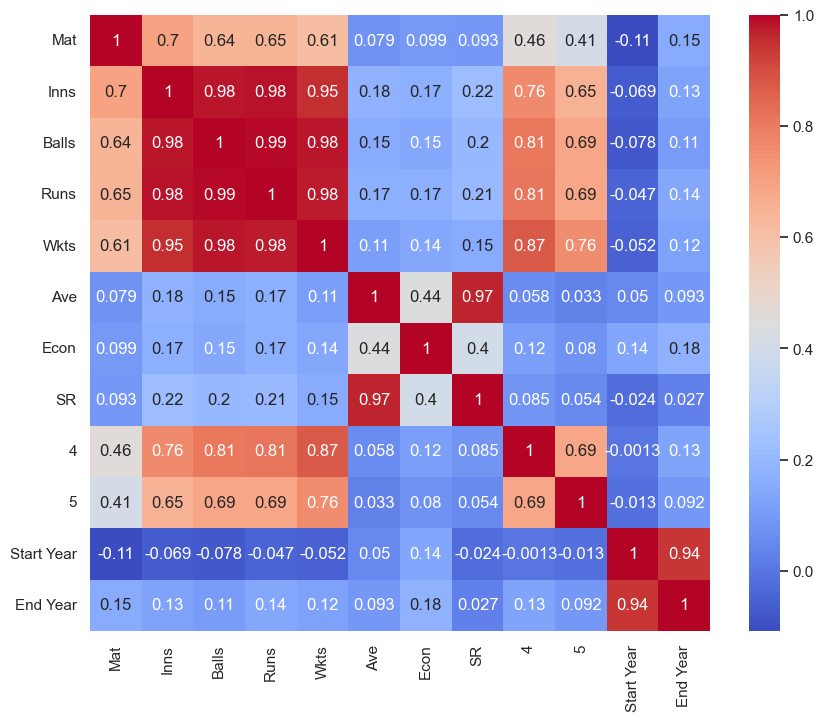

In [74]:
plt.figure(figsize = (10, 8))
sns.heatmap(bowling.corr(), annot = True, cmap="coolwarm")
plt.savefig('Correlation')
plt.show()

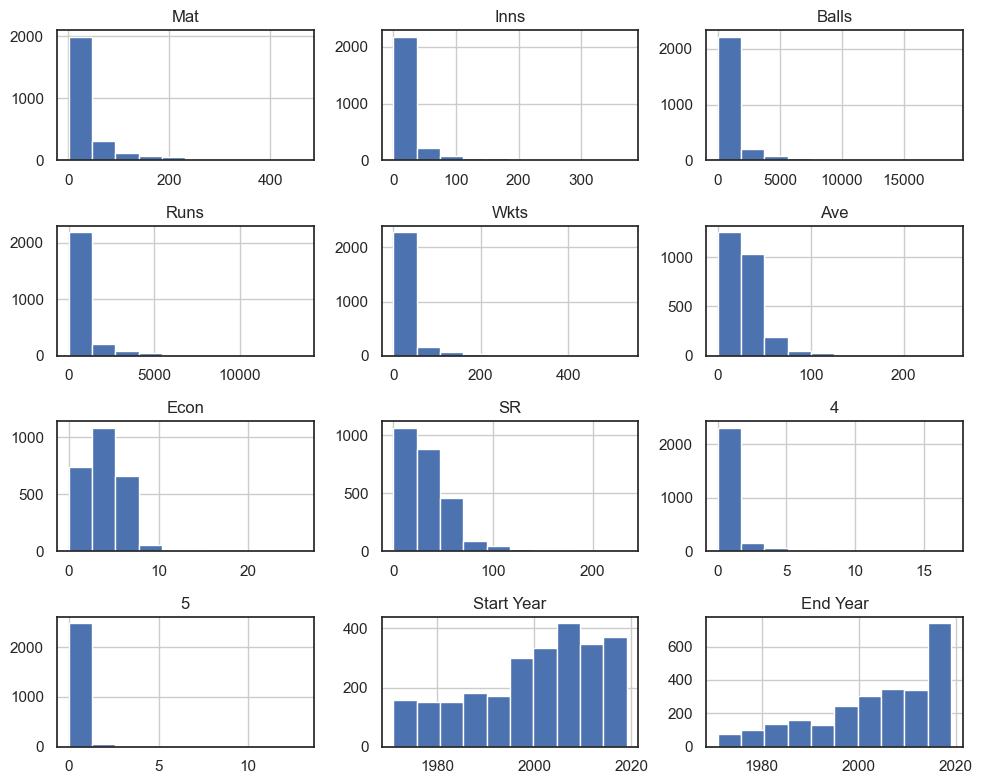

In [73]:
bowling.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

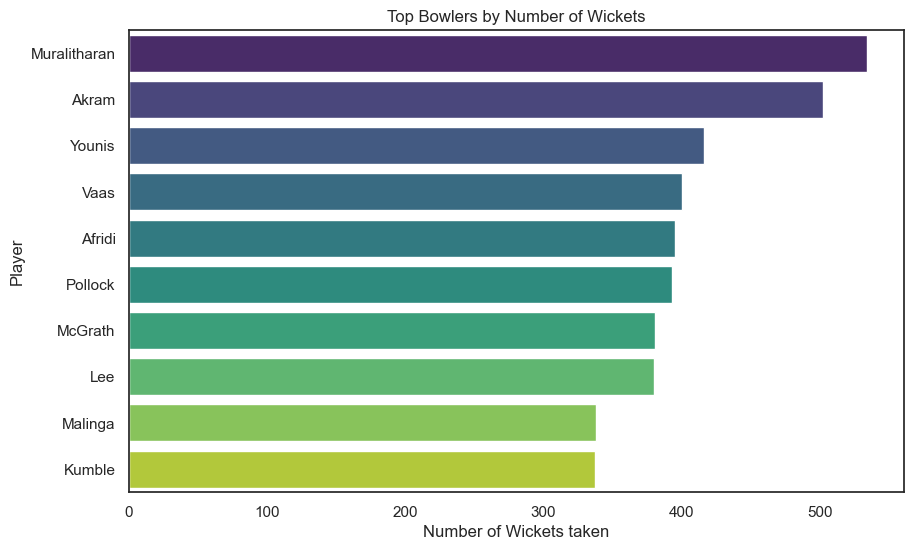

In [75]:
top = bowling.nlargest(10, 'Wkts')  
plt.figure(figsize=(10, 6))
sns.barplot(x='Wkts', y='Player', data=top, palette='viridis')
plt.xlabel('Number of Wickets taken')
plt.title('Top Bowlers by Number of Wickets')
plt.show()

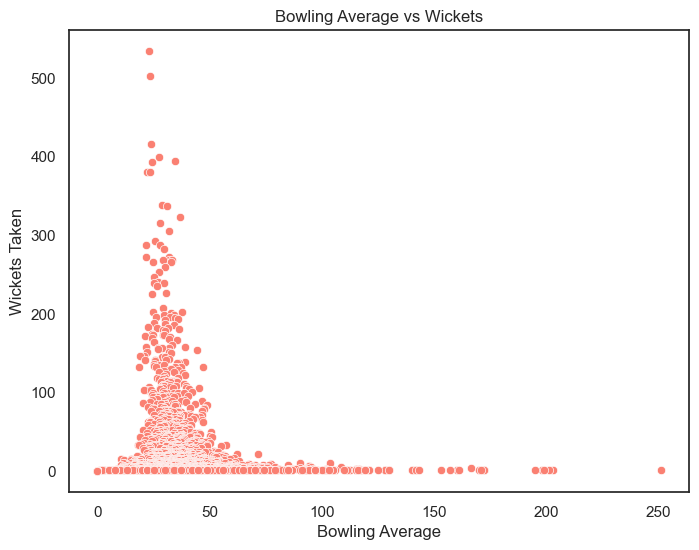

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ave', y='Wkts', data=bowling, color='salmon')
plt.xlabel('Bowling Average')
plt.ylabel('Wickets Taken')
plt.title('Bowling Average vs Wickets')
plt.show()

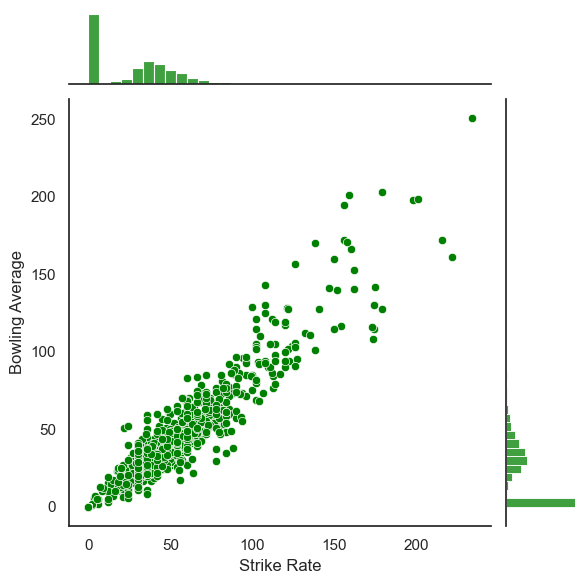

In [77]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='SR', y='Ave', data=bowling, kind='scatter', color='green')
plt.xlabel('Strike Rate')
plt.ylabel('Bowling Average')
plt.show()

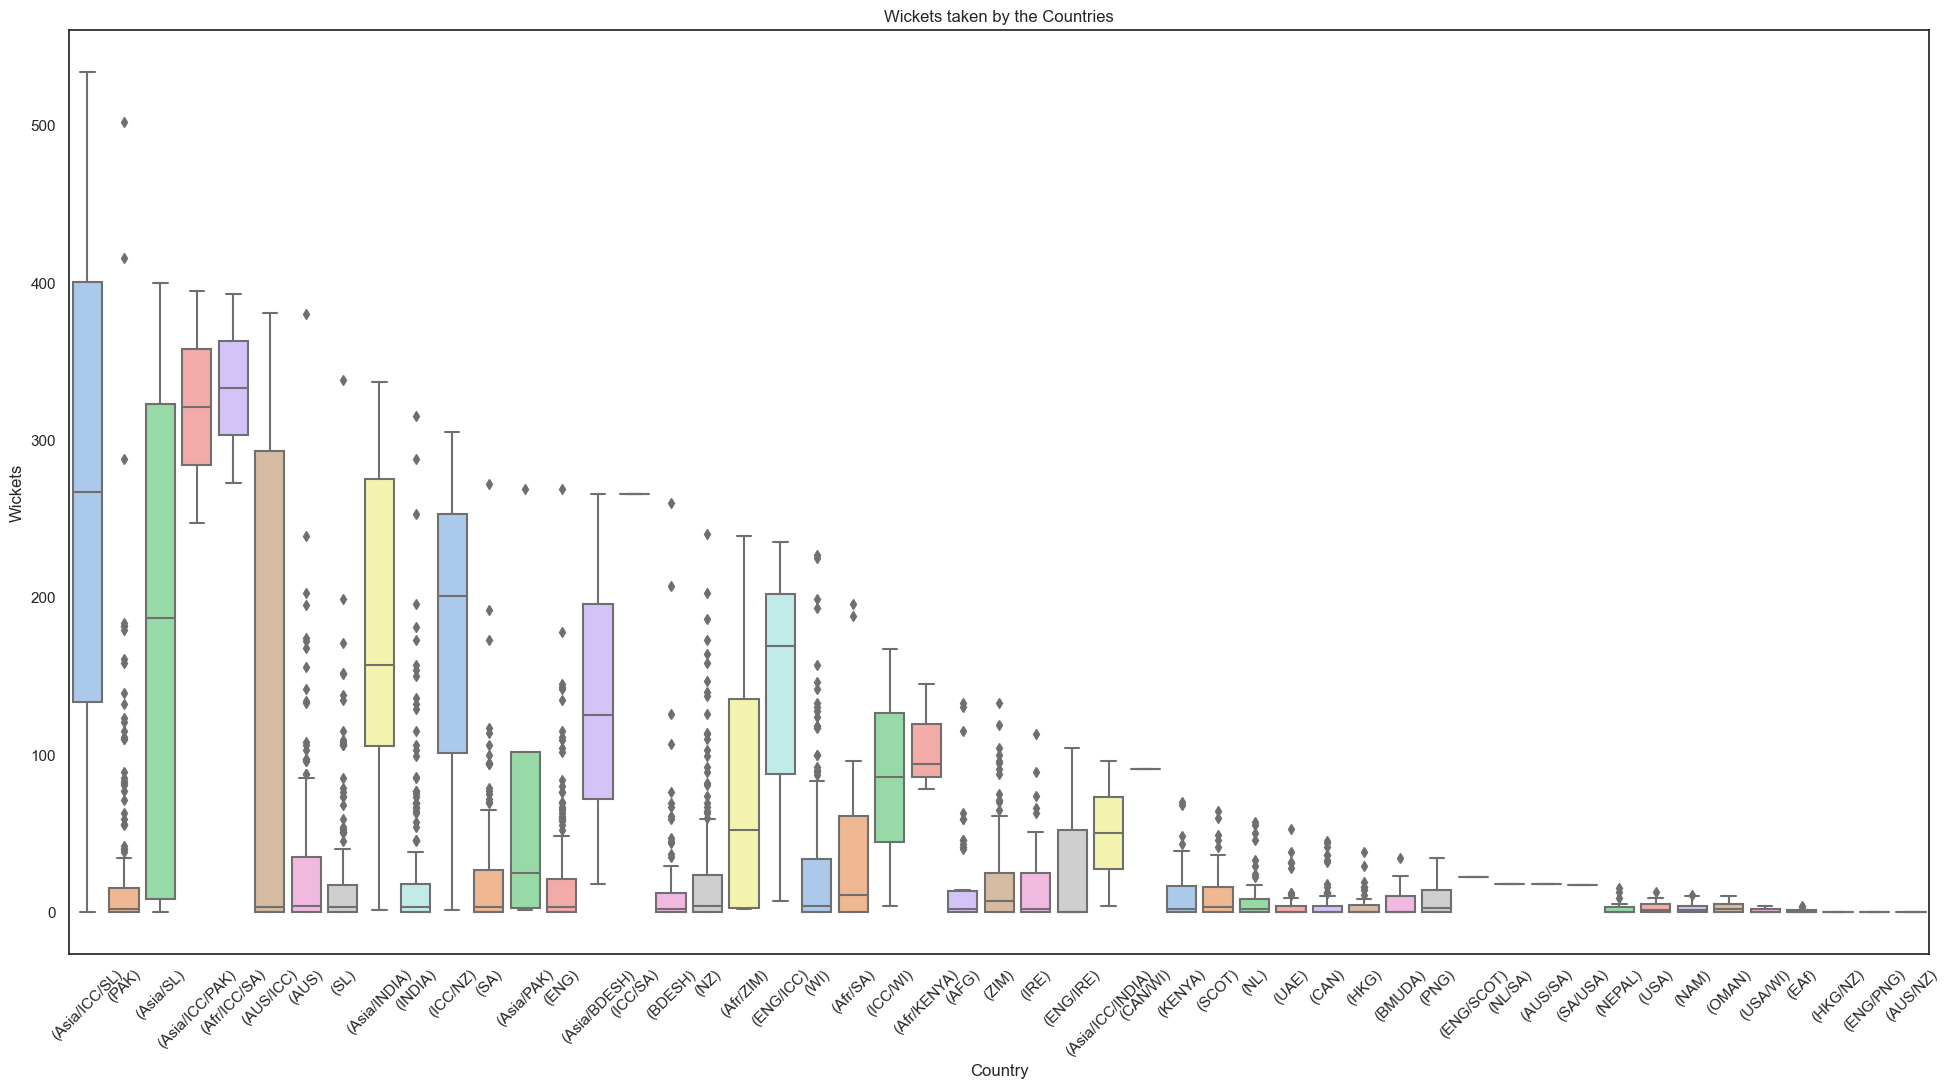

In [81]:
plt.figure(figsize=(24, 12))
sns.boxplot(x='Country', y='Wkts', data=bowling, palette='pastel')
plt.xlabel('Country')
plt.ylabel('Wickets')
plt.title('Wickets taken by the Countries')
plt.xticks(rotation=45)
plt.show()

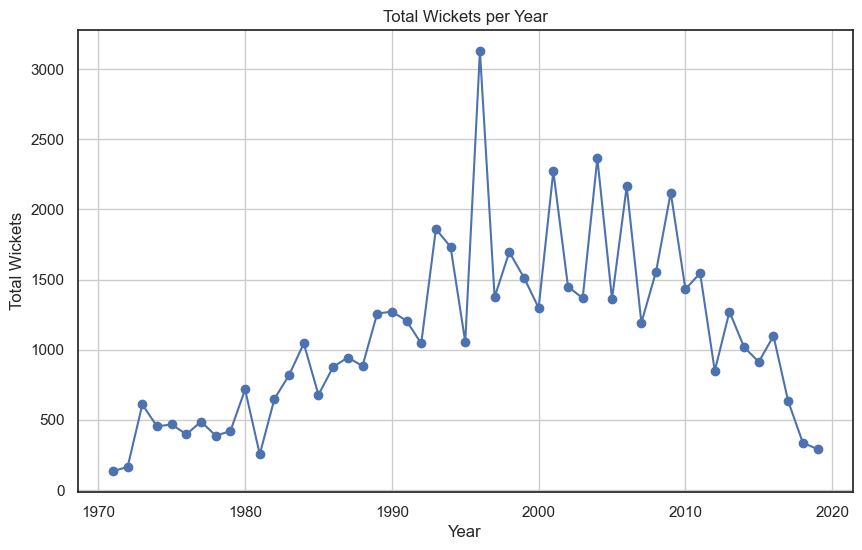

In [36]:
bowling_data['Strt'] = pd.to_datetime(bowling_data['Strt'], format='%Y')

# Group by start year and calculate total wickets for each year
wickets_per_year = bowling_data.groupby(bowling_data['Strt'].dt.year)['Wkts'].sum()

# Plotting the time series (total wickets per year)
plt.figure(figsize=(10, 6))
wickets_per_year.plot(marker='o', linestyle='-')
plt.title('Total Wickets per Year')
plt.xlabel('Year')
plt.ylabel('Total Wickets')
plt.grid(True)
plt.show()

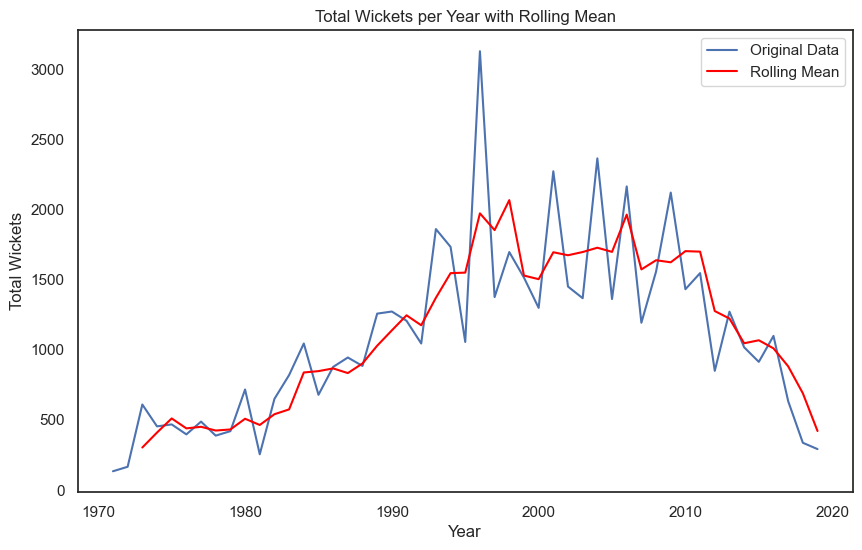

In [37]:
rolling_mean = wickets_per_year.rolling(window=3).mean()  # Adjust window size as needed

# Plotting original data and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(wickets_per_year, label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.title('Total Wickets per Year with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Total Wickets')
plt.legend()
plt.show()

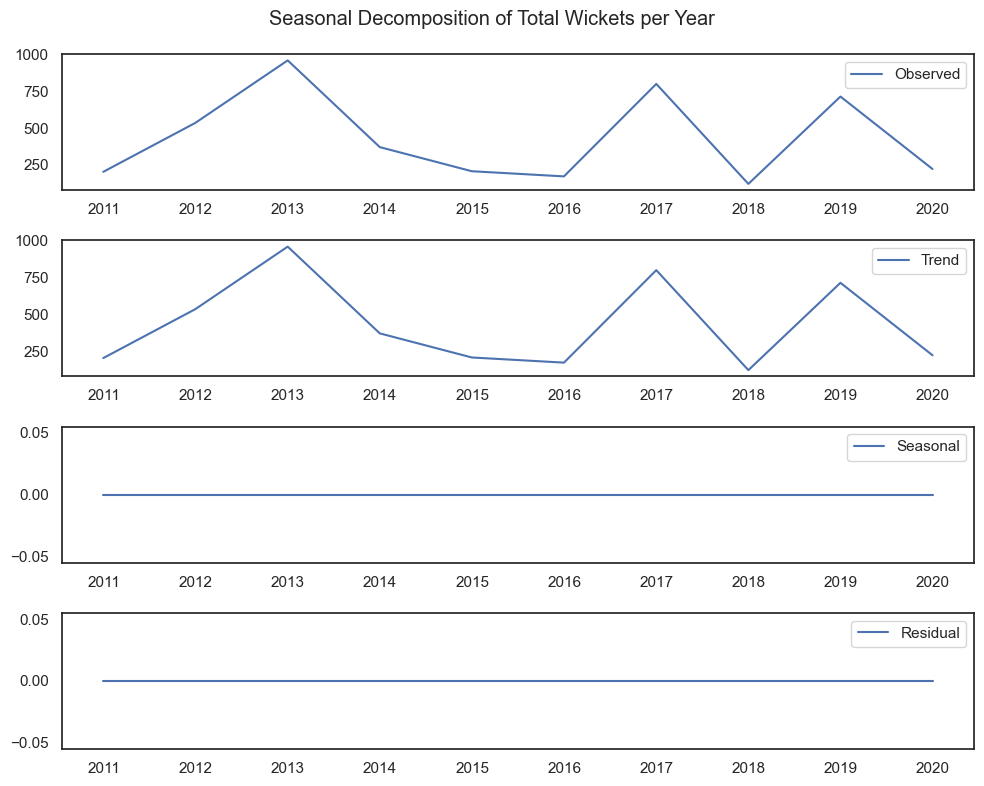

In [41]:
np.random.seed(42)
years = pd.date_range(start='01-01-2010', periods=10, freq='Y')
wickets_per_year = pd.Series(np.random.randint(100, 1000, size=len(years)), index=years)

# Decompose the time series
decomposition = seasonal_decompose(wickets_per_year, model='additive', extrapolate_trend='freq')

# Plotting the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.suptitle('Seasonal Decomposition of Total Wickets per Year')
plt.tight_layout()
plt.show()


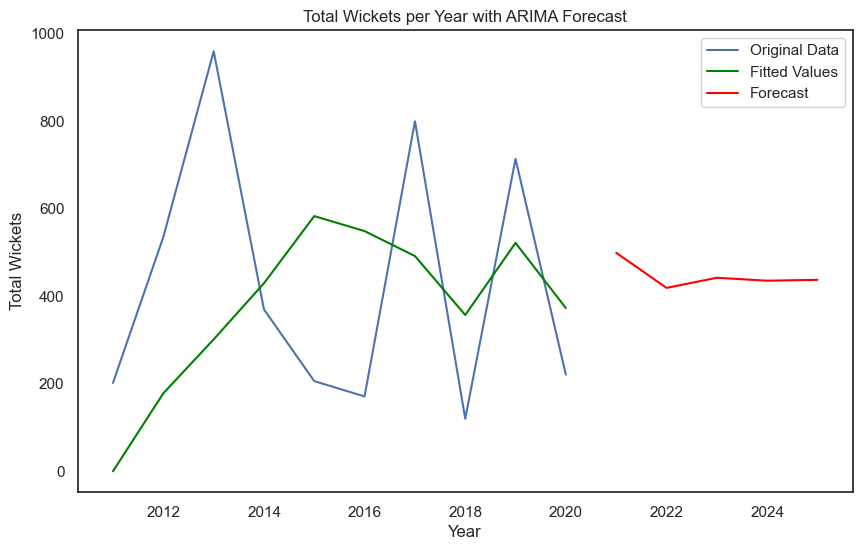

In [53]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(wickets_per_year, order=(1, 1, 1))  # ARIMA(p, d, q) - adjust parameters as needed
fitted_model = model.fit()

# Forecasting
forecast_steps = 5  # Number of steps to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Plotting original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(wickets_per_year, label='Original Data')
plt.plot(fitted_model.fittedvalues, color='green', label='Fitted Values')
plt.plot(fitted_model.forecast(steps=forecast_steps), color='red', label='Forecast')
plt.title('Total Wickets per Year with ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Total Wickets')
plt.legend()
plt.show()


## Hypothesis: Different countries tend to have different Economies 
In this case we fail to reject the null hypothesis, as it can be seen that there is no significant difference between the economies of different countries as the F-statistic is low indicating no variation between the groups and sicne P-value is higher suggesting not much difference between the economies.

In [82]:
countries = bowling['Country'].unique()  
grouped = [bowling[bowling['Country'] == country]['Econ'] for country in countries]
f_statistic, p_value = f_oneway(*grouped)
print(f"One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA results:
F-statistic: 1.1092098359851377
P-value: 0.2789434255900259


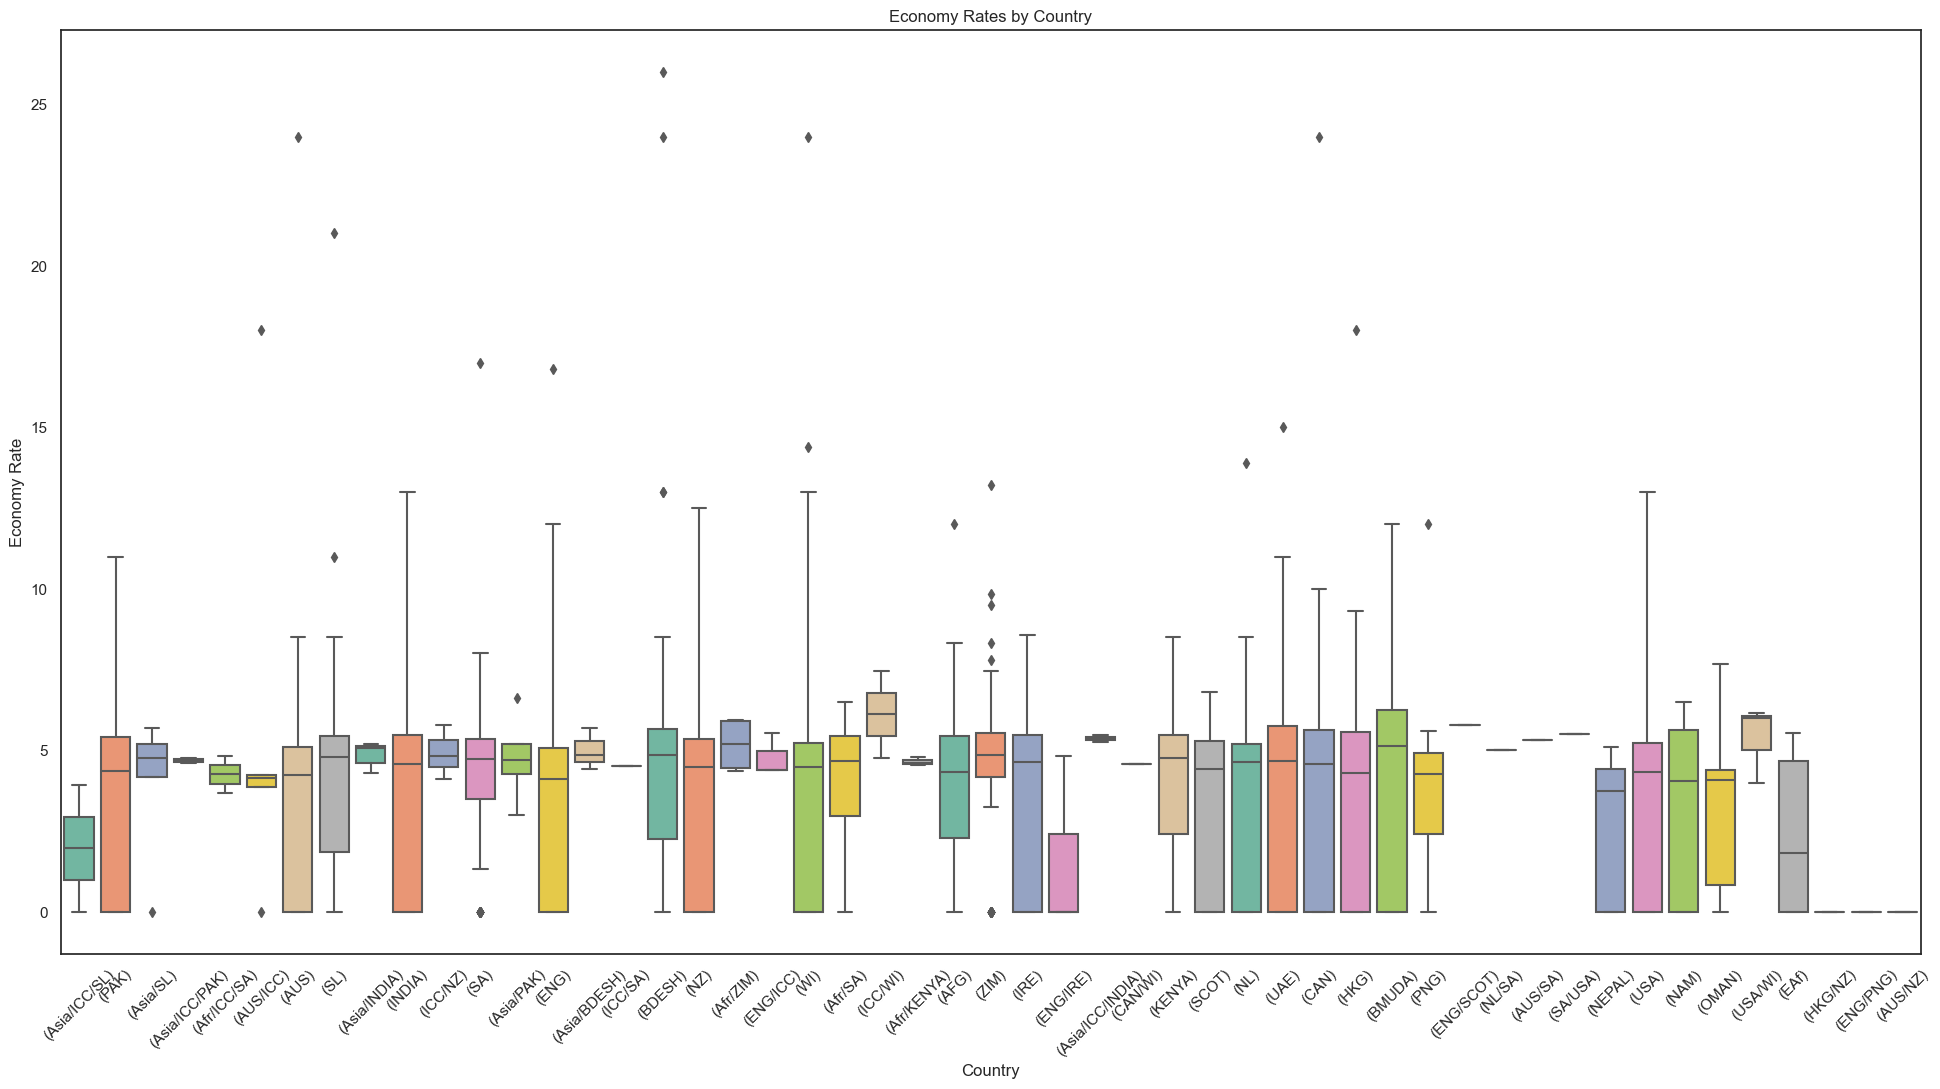

In [85]:
plt.figure(figsize=(24, 12))
sns.boxplot(x='Country', y='Econ', data=bowling, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Economy Rate')
plt.title('Economy Rates by Country')
plt.xticks(rotation=45)
plt.show()


## Hypothesis: Bowling Averages are similar among different countries
By conducting the Anova Test, we found out that the F-statistic is low suggesting a lower variation between the groups and the P-value is higher meaning there is no significant difference in the bowling averages among the countries

In [86]:
countries = bowling['Country'].unique()
grouped = [bowling[bowling['Country'] == country]['Ave'].dropna() for country in countries]
f_statistic, p_value = f_oneway(*grouped)
print("Hypothesis 1: Performance by Country")
print(f"One-way ANOVA results for Bowling Average:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

Hypothesis 1: Performance by Country
One-way ANOVA results for Bowling Average:
F-statistic: 1.0615778034454826
P-value: 0.35825004618253226


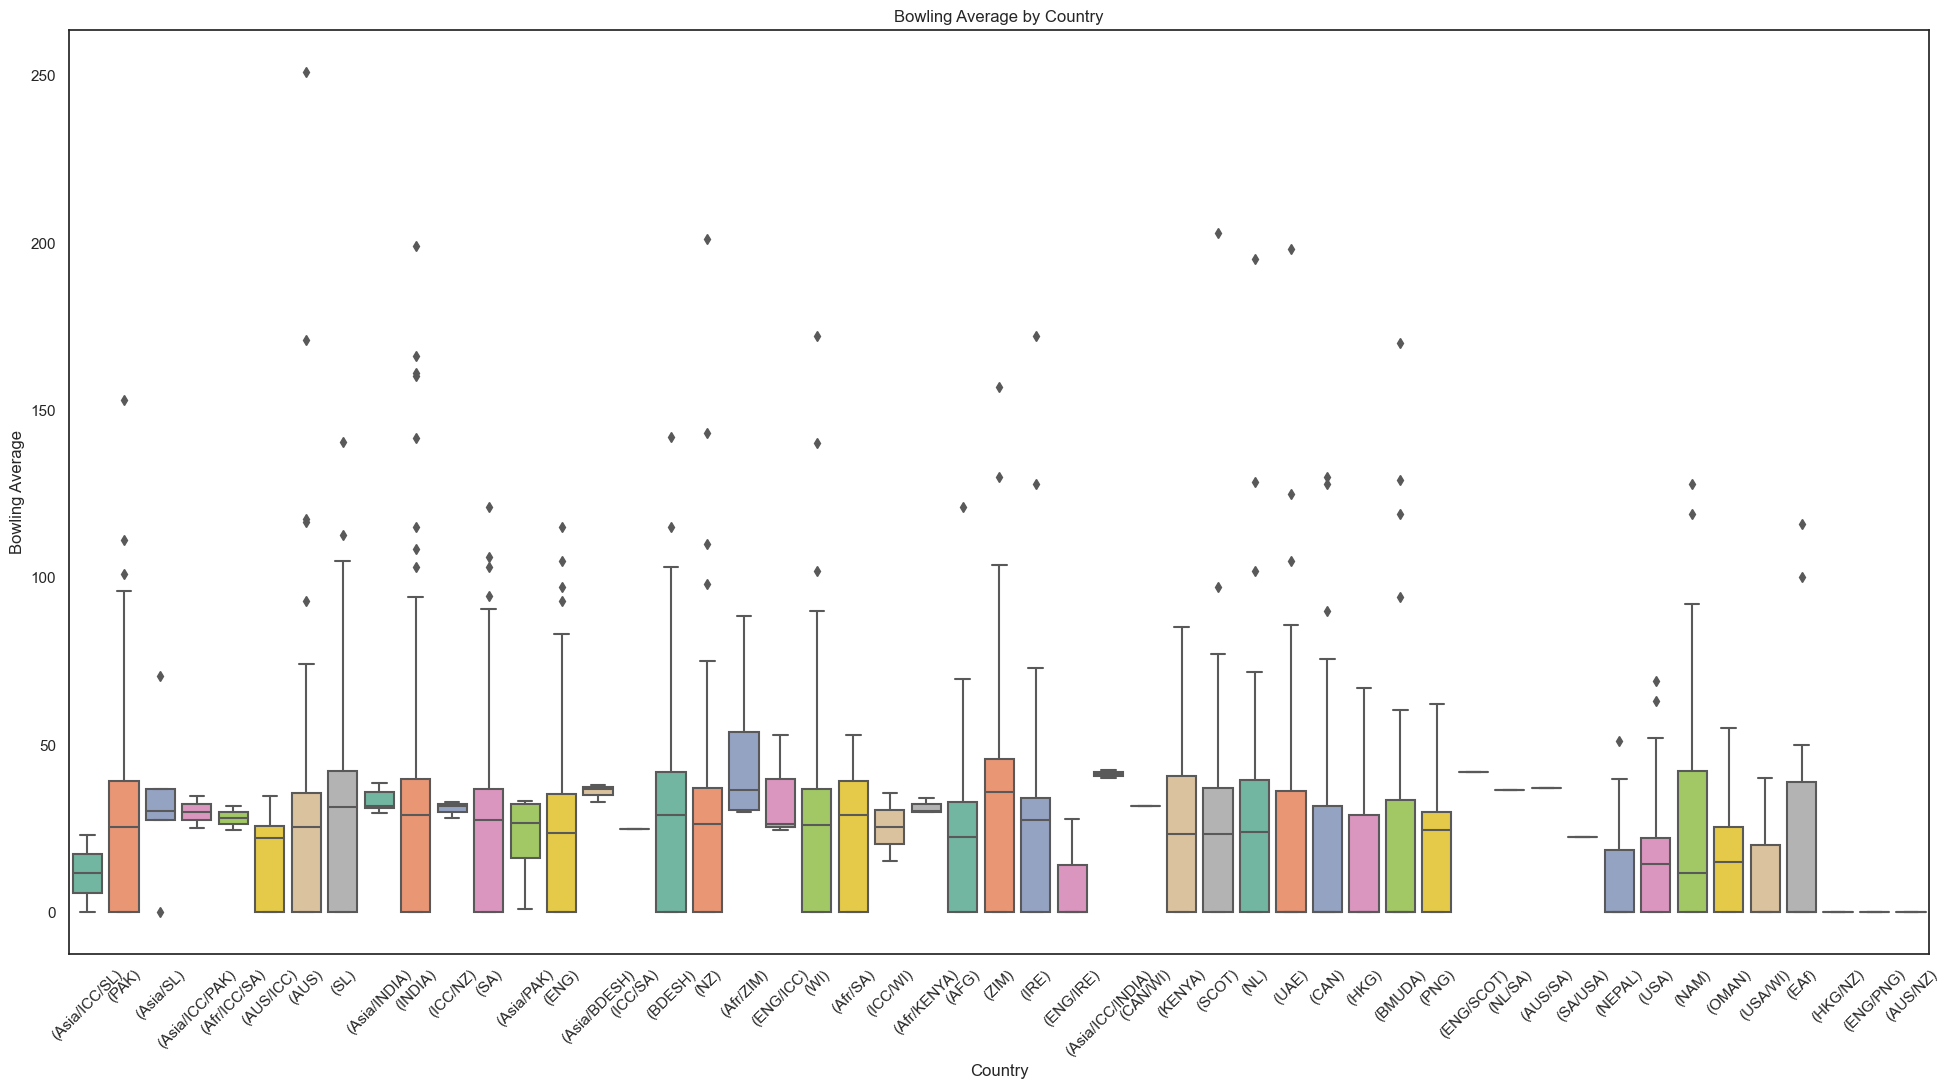

In [89]:
plt.figure(figsize=(24, 12))
sns.boxplot(x='Country', y='Ave', data=bowling, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Bowling Average')
plt.title('Bowling Average by Country')
plt.xticks(rotation=45)
plt.show()

## Hypothesis: There is a consistent pattern in the Average after wickets taken.
There is a strong correlation as indicated by the Spearman correlation coefficient and P-value is 0 which suggests that as the number of wickets taken increases there a consistent trend in the bowling average. 

In [92]:
wickets = bowling['Wkts'].dropna()
corr_wickets_avg, p_value = spearmanr(wickets, bowling_average)
print("\nHypothesis 3: Consistency")
print(f"Spearman's correlation coefficient: {corr_wickets_avg}")
print(f"P-value: {p_value}")


Hypothesis 3: Consistency
Spearman's correlation coefficient: 0.6815807956685936
P-value: 0.0


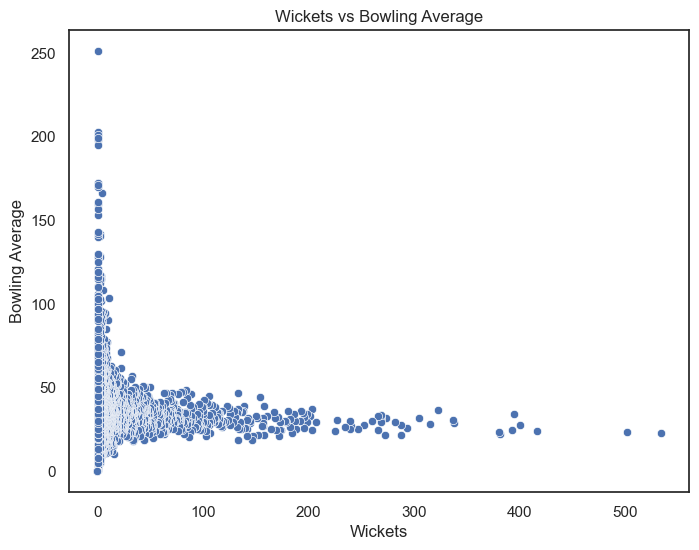

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wkts', y='Ave', data=bowling)
plt.xlabel('Wickets')
plt.ylabel('Bowling Average')
plt.title('Wickets vs Bowling Average')
plt.show()